In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [6]:
train_data = pd.read_csv("/Users/nikhil/Desktop/Leegality_task/archive/traindata.csv")
train_data.head()

,ImgName,GroundTruth,smallLexi,mediumLexi
0,train/1009_2.png,YOU,"['YOU', '1200', '1300', '135', '149', '324', '...","['YOU', '0', '000', '010050', '0123', '019901'..."
1,train/1017_1.png,RESCUE,"['RESCUE', '16', '208', '226', '300', '629', '...","['RESCUE', '0', '0123', '01234', '01922', '06'..."
2,train/1017_2.png,MISSION,"['MISSION', '0', '10234', '123', '1380', '2008...","['MISSION', '0', '000', '01234', '01922', '019..."
3,train/1021_1.png,HOME,"['HOME', '010050', '143KM', '2008', '208', '25...","['HOME', '0', '000', '010050', '01234', '01990..."
4,train/1023_1.png,BORDER,"['BORDER', '12', '143KM', '17', '2003', '2009'...","['BORDER', '0', '000', '010050', '0123', '0123..."


In [7]:
train_df = train_data.drop(['smallLexi', 'mediumLexi'], axis=1)

In [8]:
train_df.head()

,ImgName,GroundTruth
0,train/1009_2.png,YOU
1,train/1017_1.png,RESCUE
2,train/1017_2.png,MISSION
3,train/1021_1.png,HOME
4,train/1023_1.png,BORDER


In [9]:
def size_check(path):
    img = cv2.imread(os.path.join('/Users/nikhil/Desktop/Leegality_task/archive/IIIT5K-Word_V3.0/IIIT5K', path))
    return img.shape[:2]

train_df['size'] = train_df.apply(lambda x: size_check(x['ImgName']), axis=1)

In [10]:
train_df.head()

,ImgName,GroundTruth,size
0,train/1009_2.png,YOU,"(43, 78)"
1,train/1017_1.png,RESCUE,"(30, 92)"
2,train/1017_2.png,MISSION,"(30, 99)"
3,train/1021_1.png,HOME,"(47, 78)"
4,train/1023_1.png,BORDER,"(21, 90)"


In [11]:
train_df['len'] = train_df['GroundTruth'].apply(len)
train_df['len'].describe()

count    2000.000000
mean        4.839000
std         2.471261
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        22.000000
Name: len, dtype: float64

In [14]:
test_df = pd.read_csv("/Users/nikhil/Desktop/Leegality_task/archive/testdata.csv")
test_df = test_df.drop(['smallLexi', 'mediumLexi'], axis=1)
test_df['len'] = test_df['GroundTruth'].apply(len)
test_df['len'].describe()

count    3000.000000
mean        5.089667
std         2.638803
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        22.000000
Name: len, dtype: float64

In [30]:
train_df['height'] = train_df['size'].apply(lambda x: x[0])
train_df['width'] = train_df['size'].apply(lambda x: x[1])
train_df.drop(columns=['size'], inplace=True)

In [38]:
print(train_df['height'].mean())
print(train_df['height'].max())
print(train_df['height'].median())
print(train_df['height'].mode())
print(train_df['width'].mean())
print(train_df['width'].max())
print(train_df['width'].median())
print(train_df['width'].mode())


44.464
704
32.0
0    24
Name: height, dtype: int64
111.939
2836
77.0
0    41
Name: width, dtype: int64


In [35]:
train_df['width'].value_counts()

width
41     39
50     29
42     27
76     27
51     26
       ..
365     1
485     1
316     1
205     1
11      1
Name: count, Length: 337, dtype: int64

(35, 93)


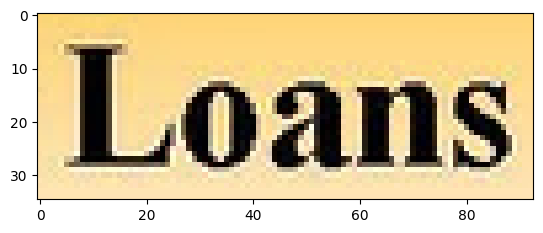

In [29]:
# img_path= train_df[train_df['ImgName']== 'train/6_7.png'].item()
img = cv2.imread(os.path.join('/Users/nikhil/Desktop/Leegality_task/archive/IIIT5K-Word_V3.0/IIIT5K', 'train/6_7.png'))
plt.imshow(img)
print(img.shape[:2])
plt.show()

In [44]:
from model import OCRModel
from main import LabelConverter, load_config
import pandas as pd

config = load_config('./config.json')

train_df = pd.read_csv(config['data']['train_csv'])
all_text = "".join(train_df['GroundTruth'].astype(str).tolist())
converter = LabelConverter(all_text)
print(f"Vocabulary size: {converter.vocab_size}")

ocr_model = OCRModel(vocab_size=40, d_model=256, nhead=4, num_encoder_layers=2, num_decoder_layers=4, resnet_layers=18, max_len=32)
pytorch_total_params = sum(p.numel() for p in ocr_model.parameters())
print(f"Total number of parameters: {pytorch_total_params}")


Vocabulary size: 40
Total number of parameters: 17122664


/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/opt/miniconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
